<a href="https://colab.research.google.com/github/InduwaraGayashan001/PyTorch/blob/main/Tensor_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!pip install -q torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.5 MB/s eta 0:00:00


In [2]:
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "mnist_1.jpg"

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
print("torch version : {}".format(torch.__version__))

torch version : 2.6.0+cu124


# Converting Images to Batched Tensors

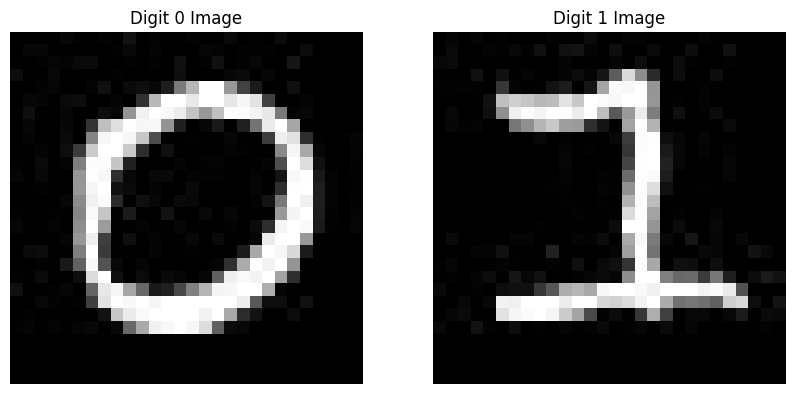

In [5]:
digit_0_array_og = cv2.imread("mnist_0.jpg")
digit_1_array_og = cv2.imread("mnist_1.jpg")

digit_0_array_gray = cv2.imread("mnist_0.jpg",cv2.IMREAD_GRAYSCALE )
digit_1_array_gray = cv2.imread("mnist_1.jpg",cv2.IMREAD_GRAYSCALE )

# Visualize the image

fig, axs = plt.subplots(1,2, figsize=(10,5))


axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title("Digit 0 Image")
axs[0].axis('off')

axs[1].imshow(digit_1_array_og, cmap="gray", interpolation = 'none')
axs[1].set_title("Digit 1 Image")
axs[1].axis('off')

plt.show()

In [6]:
print("Image array shape: ",digit_0_array_og.shape)
print(f"Min pixel value:{np.min(digit_0_array_og)} ; Max pixel value : {np.max(digit_0_array_og)}")


Image array shape:  (28, 28, 3)
Min pixel value:0 ; Max pixel value : 255


In [7]:
digit_0_array_gray

array([[  0,   0,   0,   0,   7,   1,   0,   3,   0,  18,   0,   3,   0,
          0,   3,   0,   0,   9,   0,   2,   0,  11,   0,   1,   0,   0,
          0,   0],
       [  0,   7,   7,   0,   0,   0,   0,   0,   2,   8,   0,   4,   0,
          0,   0,   6,   4,   0,   2,   3,   2,   0,   0,  11,   0,   0,
          0,   0],
       [  1,   0,   2,   6,   4,   9,   9,   0,   0,   2,   0,   3,   1,
         15,   0,   2,  16,   0,   2,   7,   0,   0,  22,   0,   0,   0,
          0,   0],
       [ 12,   0,   0,   8,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         14,   0,   0,   0,   7,   9,   0,   7,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   3,   5,   0,   0,   4,  16,   0,  10,  14,   6,  29,
        122, 182, 255, 255, 152,  66,  26,   0,   0,  15,   0,   0,   0,
          0,   0],
       [  0,   7,   5,   0,   9,  12,   0,   0,   4,   0,  49, 184, 255,
        255, 232, 255, 255, 231, 246, 227,  64,   0,   0,   4,   0,   0,
          0,   0],
       [  2,  15,   0,   0,   6,   0,   0,  13,   6, 148, 241, 255, 248,
        236, 194, 151, 192, 253, 252, 244, 231, 121,   5,   6,   0,   0,
          0,   0],
       [  0,   7,   0,   0,   7,   0,  51, 191, 223, 254, 247, 248, 148,
         30,   0,   6,  24,   0,  32, 116, 235, 255, 166,   0,   0,   0,
          0,   0],
       [  0,   4,   0,   0,  10,   0, 132, 246, 255, 247, 199,  77,   0,
          0,   2,   0,   0,   7,   0,   0,  60, 238, 226,  46,   2,   0,
          1,   5],
       [  0,   0,   4,   0,  14,  59, 203, 255, 255, 201,  45,   1,  15,
          0,   0,   1,   0,   4,   2,   0,   0, 137, 246, 169,   7,   0,
          0,   4],
       [  2,   0,   9,   0,   4, 127, 252, 252, 198,  32,   0,   0,   0,
          5,   0,   3,   4,   0,   0,   1,   5,  78, 255, 222,  16,   1,
          0,   3],
       [  5,   0,   8,   0,   0, 150, 254, 247,  46,   7,   0,   8,   9,
          0,   4,   3,   3,   0,   0,   4,   0,  19, 248, 254,  25,   4,
          0,   2],
       [  0,   1,   2,   0,   1, 150, 246, 255,  17,   9,   0,   4,   0,
          0,   9,   0,   0,   0,   0,   6,   0,  46, 254, 255,  30,   5,
          0,   2],
       [  0,   1,   0,   0,   6, 139, 241, 251,  43,   0,  15,   6,   0,
          9,   7,   0,   0,   0,   0,   3,  19, 120, 255, 240,  31,   5,
          0,   3],
       [  2,   0,   0,   2,   1, 133, 249, 197,   0,  27,   0,   0,  18,
          0,   0,   8,   0,   7,   1,   0,   0, 153, 245, 255,  29,   3,
          0,   5],
       [  6,   0,   0,   4,   0, 142, 255, 156,   1,   0,   4,   0,   0,
          6,   0,   0,   0,   3,   0,  10,  45, 245, 255, 250,  26,   2,
          0,   6],
       [  0,   0,   0,   0,   5, 152, 239,  63,   0,  14,   0,   4,   0,
          1,   8,   0,   9,   0,   0,   5, 236, 255, 255, 152,   0,   0,
          0,   0],
       [  0,   9,  11,   0,   1, 126, 255,  59,   0,   1,   0,   5,   0,
          1,   2,   0,   0,   0,  27, 169, 255, 247, 217,  26,   0,   0,
          0,   0],
       [  0,   0,   2,   0,  25,  97, 248,  83,   7,   0,   6,   0,   1,
          0,   0,   0,   5,  47, 171, 255, 243, 255, 148,   0,   0,   0,
          0,   0],
       [  2,   0,  10,   0,   0,  13, 219, 255,  15,   0,  11,   0,   9,
          6,   0,   7,  97, 239, 249, 243, 255, 163,  46,   0,   0,   0,
          0,   0],
       [ 15,   0,   0,   2,   6,   0, 100, 232, 246, 166, 104,  24,  32,
         72, 128, 180, 245, 247, 255, 255, 174,   4,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   8,   3,   0,   2,  63, 226, 254, 248, 255, 246, 255,
        255, 255, 255, 255, 255, 237,  88,  13,  13,   0,  17,   0,   0,
          0,   0],
       [  0,   2,   0,   0,   0,   0,   0,  18, 199, 235, 250, 255, 255,
        255, 255, 242, 255, 169,  43,  18,   0,   0,  11,   0,   0,   0,
          0,   0],
       [  2,   5,   0,   4,   1,   5,   8,   0,   9, 104, 169, 241, 248,
        255, 247, 220,  95,  10,   7,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Image tensor shape:  torch.Size([28, 28, 3])
Min pixel value:0.0 ; Max pixel value : 1.0


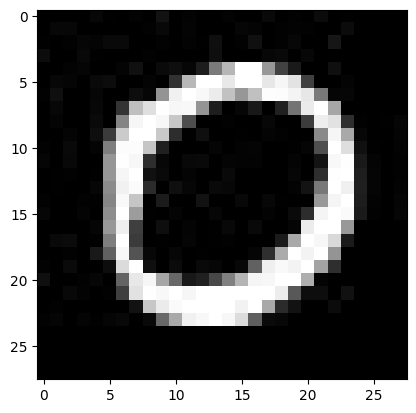

In [8]:
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32)/ 255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32)/255.0

print("Image tensor shape: ",img_tensor_0.shape)
print(f"Min pixel value:{torch.min(img_tensor_0)} ; Max pixel value : {torch.max(img_tensor_0)}")

plt.imshow(img_tensor_0, cmap='gray')
plt.show()

In [9]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])
print("Batch tensor shape: ",batch_tensor.shape)

Batch tensor shape:  torch.Size([2, 28, 28, 3])


In [10]:
batch_input = batch_tensor.permute(0,3,1,2)
print("Batch tensor shape: ",batch_input.shape)

Batch tensor shape:  torch.Size([2, 3, 28, 28])


# Construct a Tensor

In [11]:
 a = torch.ones(5)
 print(a)

 b = torch.zeros(5)
 print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0.])


In [12]:
c = torch.tensor([1.0,2.0,3.0, 4.0, 5.0])
print(c)

tensor([1., 2., 3., 4., 5.])


In [13]:
# 2D tensors

d = torch.tensor([[1.0,2.0],[3.0,4.0]])
print(d)

e = torch.ones(2,2)
print(e)

f = torch.zeros(2,2)
print(f)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 1.],
        [1., 1.]])
tensor([[0., 0.],
        [0., 0.]])


In [14]:
# 3D tensors

g = torch.tensor([[[1.0,2.0],[3.0,4.0]],[[5.0,6.0],[7.0,8.0]]])
print(g)

h = torch.ones(2,2,2)
print(h)

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])


In [15]:
print(a.shape)
print(d.shape)
print(g.shape)

torch.Size([5])
torch.Size([2, 2])
torch.Size([2, 2, 2])


# Access a Element in Tensor

In [16]:
print(c[2])
print(d[1,1])
print(g[1,0,1])

tensor(3.)
tensor(4.)
tensor(6.)


In [17]:
print(c[:])
print(d[1,:])
print(g[1,:2,:])

tensor([1., 2., 3., 4., 5.])
tensor([3., 4.])
tensor([[5., 6.],
        [7., 8.]])


# Specify Data Type of Elements

In [18]:
int_tensor = torch.tensor([[1,2],[3,4]])
print(int_tensor)
print(int_tensor.dtype)

float_tensor = torch.tensor([[1,2],[3,4.]])
print(float_tensor)
print(float_tensor.dtype)


int_tensor= float_tensor.type(torch.int64)
print(int_tensor)
print(int_tensor.dtype)

tensor([[1, 2],
        [3, 4]])
torch.int64
tensor([[1., 2.],
        [3., 4.]])
torch.float32
tensor([[1, 2],
        [3, 4]])
torch.int64


# Tensor to/from Numpy Array

In [19]:
f_numpy = f.numpy()
print(f_numpy)


h = np.array([[1.0,2.0],[3.0,4.0]])
h_tensor = torch.from_numpy(h)
print(h_tensor)

[[0. 0.]
 [0. 0.]]
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


# Arithmetic Operations in Tensors

In [20]:
tensor1= torch.tensor([[1,2,3],[4,5,6]])
tensor2 = torch.tensor([[-1,2,-3],[4, -5, 6]])

# Addition
print(tensor1 + tensor2)
print(torch.add(tensor1,tensor2))

# Subtraction
print(tensor1 - tensor2)
print(torch.sub(tensor1,tensor2))

# Multiplication
print(tensor1 * tensor2)
print(torch.mul(tensor1,tensor2))

# Scaler Multiplication
print(tensor1 * 2)

# Elementwise Multiplication
print(tensor1 * tensor2)

# Matrix Multiplication
tensor3= torch.tensor([[1,2],[3,4],[5,6]])
print(torch.matmul(tensor1,tensor3))

# Division by scale
print(tensor1 / 2)

# Elementwise Division
print(tensor1 / tensor2)


tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 0,  4,  0],
        [ 8,  0, 12]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ 2,  0,  6],
        [ 0, 10,  0]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
tensor([[ -1,   4,  -9],
        [ 16, -25,  36]])
tensor([[22, 28],
        [49, 64]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])
tensor([[-1.,  1., -1.],
        [ 1., -1.,  1.]])


# Broadcasting

In [21]:
 a = torch.tensor([1,2,3])
 b = torch.tensor([4])

 print(a + b)

tensor([5, 6, 7])


In [22]:
a = torch.tensor([1,2,3])
b = torch.tensor([[4],[5],[6]])

print(a + b)

tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


# CPU v/s GPU Tensor

In [23]:
tensor_cpu = torch.tensor([[1.0,2.0],[3.0,4.0]], device='cpu')
print(tensor_cpu)

tensor_gpu = torch.tensor([[1.0,2.0],[3.0,4.0]], device='cuda')
print(tensor_gpu)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')


In [24]:
tensor_gpu_cpu = tensor_gpu.to(device='cpu')
print(tensor_gpu_cpu)

tensor_cpu_gpu = tensor_cpu.to(device='cuda')
print(tensor_cpu_gpu)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')
